In [47]:
# scipy的constants模块包含了众多的物理常数
from scipy import constants as C
# 真空中的光速
C.c

299792458.0

In [2]:
# 普朗克常量
C.h

6.62607004e-34

In [5]:
# pyhsical_constants字典,以物理常量名为键
# 对应的值时一个含有三个元素的原组，分别为
# 常数值，单位，误差
# 如
C.physical_constants["electron mass"]

(9.10938356e-31, 'kg', 1.1e-38)

In [6]:
# 1英里等于多少米
C.mile

1609.3439999999998

In [7]:
C.inch

0.0254

In [8]:
C.gram

0.001

In [9]:
C.pound

0.45359236999999997

In [48]:
# special模块是一个非常完整的函数库
# 包含基本的数学函数，特殊数学函数以及numpy中所有的函数
# 如伽马函数
# 统计学中经常出现的一个函数
from IPython.display import Latex
Latex(r"\[ \Gamma(z) = \int_{0}^{\infty}t^{z-1}e^{-t}\,dt \]")

<IPython.core.display.Latex object>

In [5]:
import scipy.special as S
S.gamma(4)

6.0

In [12]:
S.gamma(0.5)

1.7724538509055159

In [13]:
S.gamma(1+1j)

(0.4980156681183547-0.1549498283018101j)

In [14]:
# 得到无穷啊
S.gamma(1000)

inf

In [15]:
# 伽马函数是阶乘函数在实数和复数范围上的扩展，他的增长速度很快
# 1000的阶乘已经超过双精度浮点的表示范围，因此结果为无穷大
# 可以使用gammaln()函数计算更大的范围,直接计算伽马函数的对数值
S.gammaln(1000)

5905.220423209181

In [16]:
1 + 1e-20

1.0

In [18]:
S.log1p(1+1e-20)

0.6931471805599453

In [16]:
# 最小二乘法公式
# least square fitting
from IPython.display import Latex
Latex(r"\[S(p)=\sum_{i=1}^{M}[y_i-f(x_i,p)]^2\]")

<IPython.core.display.Latex object>

In [18]:
# 最小二乘拟合是一种优化方法
# f(x) = kx + b, 参数k和b就是要确定的值
# 可以采用最小二乘法来拟合得到斜率和截距
# 用最小二乘法拟合直线，并显示误差曲面
import numpy as np
from scipy.optimize import leastsq

X = np.array([8.19, 2.72, 6.39, 8.71, 4.7, 2.66, 3.78])
Y = np.array([7.01, 2.78, 6.47, 6.71, 4.1, 4.23, 4.05])

def residuals(p):
    "计算以p为参数的直线和原始数据之间的误差"
    k, b = p
    return Y - (k * X + b)
# leastsq使得residuals()的输出数组和平方和最小，参数初始值为[1,0]
# leastsq函数传入误差计算函数和初始值[1,0]
r = leastsq(residuals, [1,0])
k, b = r[0]
print("k = %f, b = %f" % (k, b))

k = 0.613495, b = 1.794093


真实参数:  [10, 0.34, 0.5235987755982988]
拟合参数:  [-9.90277014  0.33976812  3.69422096]


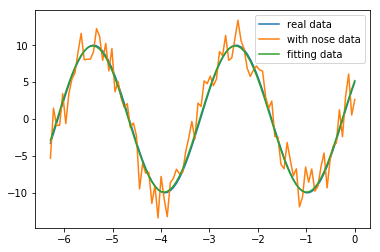

In [38]:
# 正弦波数据拟合
import numpy as np
from scipy.optimize import leastsq

def func(x, p):
    "数据拟合所用的函数A*sin(2*pi*k*x + theta)"
    A,k,theta = p
    return A*np.sin(2*np.pi*k*x + theta)
# 定义产差函数
def residuals(p, y, x):
    "实验数据x，y和拟合函数之间的差，p为拟合需要找到的系数"
    return y - func(x, p)
x = np.linspace(-2*np.pi, 0, 100)
A,k,theta = 10,0.34,np.pi/6 #真实数据的函数参数
y0 = func(x, [A, k, theta]) #真实数据
# 加上噪声之后的实验数据
y1 = y0 + 2 * np.random.randn(len(x)) # 加上一些随机扰动
p0 = [7, 0.2, 0] # 第一次猜测的函数拟合参数

plsq = leastsq(residuals, p0, args=(y1, x))
print(u"真实参数: ", [A, k, theta])
print(u"拟合参数: ", plsq[0])

# 绘图
%matplotlib inline
import pylab as pl
pl.plot(x, y0, label="real data")
pl.plot(x, y1, label="with nose data")
pl.plot(x, func(x, plsq[0]), label="fitting data")
pl.legend()
pl.show()

In [19]:
# 求二元函数的最小值
from IPython.display import Latex
Latex(r"\[ f(x,y) = (1-x)^2 + 100(y-x^2)^2 \]")

<IPython.core.display.Latex object>

In [21]:
# 利用fmin*计算函数最小值
# fmin_powell,fim_cf, fmin_bfgs
# 为了提交运算速度和精度，有些fmin函数带有fprime参数，它是计算目标函数
# f对各个自变量的偏导数的函数
# f(x,y)对变量x和y的偏导数函数为
Latex(r"""\[ \frac{\partial f}{\partial x} 
      = -2+2x-400x(y-x^2), \frac{\partial f}{\partial y}
      = 200y - 200x^2\]""")
# 这个函数叫Rosenbrock罗森布洛克函数，它经常用来测试最小算法的收敛速度

<IPython.core.display.Latex object>

In [23]:
# 观察fmin函数计算最小值时的路径
import numpy as np
import scipy.optimize as opt
import sys

points = []
def f(p):
    x,y = p
    z = (1-x)**2 + 100*(y-x**2)**2
    points.append((x,y,z))
    return z
# 定义偏导数
def fprime(p):
    x,y = p
    dx = -1 + 2*x -400*x*(y-x**2)
    dy = 200*y - 200*x**2
    return np.array([dx,dy])

init_point = (-2,-2)

try:
    method = sys.argc[1]
except:
    method = "fmin_bfgs"

fmin_func = opt.__dict__[method]
if method in ["fmin", "fmin_powell"]:
    result = fmin_func(f, init_point) # 参数为目标函数和初值
elif method in ["fmin_cg", "fmin_bfgs", "fmin_l_bfgs_b", "fmin_tnc"]:
    result = fmin_func(f, init_point, fprime)
elif method in ["fmin_cobyla"]:
    result = fmin_func(f, init_point, [])
else:
    print("fmin function not found.")
    sys.exit(0)


         Current function value: 0.332852
         Iterations: 44
         Function evaluations: 159
         Gradient evaluations: 147


In [24]:
# 非线性方程组求解
# 基本调用形式fsolve(func, x0)
def func(x):
    u1,u2,u3 = x
    return [f1(u1,u2,u3),f(u1,u2,u3),f3(u1,u2,u3)]
# 方程如下
Latex(r"\[ 5x_1 + 3 = 0 \]")

<IPython.core.display.Latex object>

In [25]:
Latex(r"\[ 4x_0^2 -2sin(x_1x_2) = 0 \]")

<IPython.core.display.Latex object>

In [26]:
Latex(r"\[ x_1x_2 - 1.5 = 0 \]")

<IPython.core.display.Latex object>

In [28]:
from scipy.optimize import fsolve
from math import sin

def f(x):
    x0, x1, x2 = x.tolist()
    return [
        5*x1 + 3,
        4*x0*x0 - 2*sin(x1*x2),
        x1*x2 - 1.5
    ]
# f计算方程组的误差，[1,1,1]是未知数的初值
result = fsolve(f, [1,1,1])
print("x0,x1,x2: ",result)
print(u"误差", f(result))

x0,x1,x2:  [-0.70622057 -0.6        -2.5       ]
误差 [0.0, -9.126033262418787e-14, 5.329070518200751e-15]


In [29]:
# 使用雅克比矩阵求解非线性方程组
# 雅克比矩阵是f分别对x0,x1,...求偏导之后得到的矩阵
# 对于未知数较多时可以显著提高速度
from scipy.optimize import fsolve
from math import sin,cos

def j(x):
    x0, x1, x2 = x.tolist()
    return [
        [0, 5, 0],
        [8*x0, -2*x2*cos(x1*x2), -2*x1*cos(x2*x2)],
        [0, x2, x1]
    ]

result = fsolve(f, [1,1,1], fprime=j)

print("result: ",result)
print(u"误差: ", f(result))

result:  [-0.70622057 -0.6        -2.5       ]
误差:  [0.0, -2.220446049250313e-16, 0.0]


In [30]:
# 插值
# 是一种通过已知的离散数据来求未知数据的方法
# 与拟合不同的是它要求曲线通过所有已知数据
# B样条曲线插值
# 一维数据的插值运算可以通过interpld()完成，调用形式如下：
# interp1d(x, y, kind='linear',...) #p1d时1234的1
# 其中kind是插值类型，给出了插值的B样条曲线的阶数，可以有以下候选值
# zero    nearest  阶梯插值，相当于0阶B样条曲线
# slinear linear   线性插值，相当于1阶B样条曲线
# quadratic cubic  2阶和3阶B样条曲线，更高阶的曲线可以直接使用整数指定

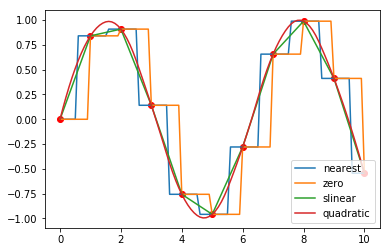

In [32]:
import numpy as np
from scipy import interpolate
import pylab as pl

x = np.linspace(0, 10, 11)
y = np.sin(x)

xnew = np.linspace(0, 10, 101)
pl.plot(x, y, 'ro')
for kind in ['nearest', 'zero', 'slinear', 'quadratic']:
    f = interpolate.interp1d(x,y,kind=kind)
    ynew = f(xnew)
    pl.plot(xnew, ynew, label=str(kind))
pl.legend(loc='lower right')
pl.show()

In [33]:
# 样条插值
# 有2个基本步骤
# 1. 使用splrep函数计算欲插值曲线的样条系数，对n维使用splprep
# 2. 在给定点上使用splev计算样条插值结果
# tck = scipy.interpolate.splrep(x,y,w=None, xb=None, xe=None, k=3,
# task=0, s=None, t=None, full_output=0, per=0, quiet=1)
# 参数s用来确定平滑点数，通常是m-SORT(2m),m是曲线点数，如果在插值中
# 不需要平滑应该设定s=0
# splrep函数输出一个3元素的元胞数组(t,c,k),其中t是曲线点，c是计算出来
# 的系数，k是样条阶数，通常是3阶，但可以通过k改变
# scipy.interpolate.splev(x, tck, der=0)其中der是进行样条计算时需要实际
# 计算到的阶数，必须满足条件der<=k

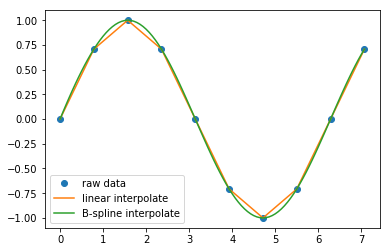

In [37]:
# 下面是使用直线和B-Spline对正弦波上的点进行插值的例子
import numpy as np
import pylab as pl
from scipy import interpolate

x = np.linspace(0, 2*np.pi+np.pi/4, 10)
y = np.sin(x)

x_new = np.linspace(0, 2*np.pi+np.pi/4, 100)
f_linear = interpolate.interp1d(x,y)
tck = interpolate.splrep(x,y)
y_bspline = interpolate.splev(x_new, tck)

pl.plot(x, y, "o", label=u"raw data")
pl.plot(x_new, f_linear(x_new), label=u"linear interpolate")
pl.plot(x_new, y_bspline, label=u"B-spline interpolate")
pl.legend()
pl.show()
# B-Spline插值需要先使用splrep函数计算出B-Spline曲线的参数
# 然后将参数传递给splev函数计算出各个取样点的插值结果

In [38]:
# 外推和Spline拟合
# 前面介绍的interp1d要求其参数x是一个递增序列，并且只能在x的
# 取值范围内进行插值，不能进行外推运算，
# 即无法计算x的取值范围之外的数据点。
# UnivariateSpline类的插值运算比interp1d更高级，支持外推
# 调用形式如下
# UnivariateSpline(x, y, w=None, bboxs=[None, None], k=3, s=None)
# x,y是保存数据点的x-y坐标的数组，其中x必须是递增序列
# w是为每个数据点指定的权重值
# bboxs序列指定的近似区间的边界
# k为样条曲线的阶数
# s是平滑参数，它使得最终生成的样条曲线满足条件
Latex(r"\[\Sigma(w\cdot(y-spline(x)))^2 \leq s\]")

<IPython.core.display.Latex object>

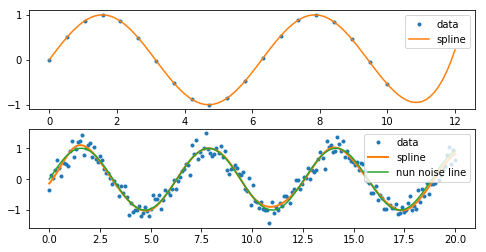

In [7]:
# 即当s>0时，样条曲线并不一定通过各个数据点
# 为了让曲线通过所有数据点，必须将参数设置为0
# 举例
%matplotlib inline
import numpy as np
import pylab as pl
from scipy import interpolate

x1 = np.linspace(0, 10, 20)
y1 = np.sin(x1)
sx1 = np.linspace(0, 12, 100)
sy1 = interpolate.UnivariateSpline(x1, y1, s=0)(sx1)

x2 = np.linspace(0, 20, 200)
# 加随机扰动
y2 = np.sin(x2) + np.random.standard_normal(len(x2)) * 0.2
sx2 = np.linspace(0, 20, 2000)
sy2 = interpolate.UnivariateSpline(x2, y2, s=8)(sx2)

pl.figure(figsize=(8,4))
pl.subplot(211)
pl.plot(x1, y1, ".", label=u"data")
pl.plot(sx1, sy1, label=u"spline")
pl.legend()

pl.subplot(212)
pl.plot(x2, y2, ".", label=u"data")
pl.plot(sx2, sy2, linewidth=2, label=u"spline")
pl.plot(x2, np.sin(x2), label=u"nun noise line")
pl.legend()
pl.show()
# 在x轴大于10的样条曲线仍然呈现出正弦波类似的形状
# 对于带噪声的输入数据选择合适的s参数能够使得样条曲线接近无噪声时的波形
# 可以把它看做使用样条曲线对数据进行拟合运算

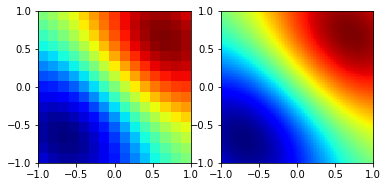

In [9]:
# 二维插值
# 使用interp2d()函数可以进行二维插值运算
# interp2d(x, y, z, kind="linear)
# 其中x，y，z都是一维数组，如果传入的是多维数组，就先将它
# 转换为一维数组；kind参数指定插值运算的阶数，可以为
# 'linear','cubic'或'quintic'
# 实例
%matplotlib inline
import numpy as np
from scipy import interpolate
import pylab as pl

def func(x, y):
    return (x+y)*np.exp(-0.5*(x**2 + y**2))

# X-Y轴分别为15*15的网格
y,x = np.mgrid[-1:1:15j, -1:1:15j]
fvals = func(x,y) # 计算每个网格上的函数值

# 二维插值
newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')

# 计算100*100的网格上的插值
xnew = np.linspace(-1, 1, 100)
ynew = np.linspace(-1, 1, 100)
fnew = newfunc(xnew, ynew)

# 绘图
# 为了更明显的比较插值前后的区别，使用关键字参数interpolation='nearest'
# 关闭imshow()内置的插值运算
pl.subplot(121)
pl.imshow(fvals, extent=[-1,1,-1,1], cmap=pl.cm.jet,
          interpolation='nearest', origin='lower')
pl.subplot(122)
pl.imshow(fnew, extent=[-1,1,-1,1], cmap=pl.cm.jet,
          interpolation='nearest', origin='lower')
pl.show()
# interp2d只能对网格形状的取样值进行插值运算

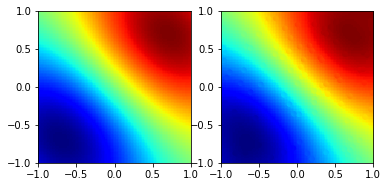

In [24]:
# 如果需要对随机散列的取样点进行插值，就需要使用径向基函数
# Radial Basis Function简称RBF插值算法；
# RBF支持多维散列点的插值运算
# 举例
%matplotlib inline
import numpy as np
from scipy import interpolate
import pylab as pl

def func(x, y):
    return (x+y)*np.exp(-0.5*(x**2 + y**2))

# 计算曲面函数上100个随机分布的点
x = np.random.uniform(-1.0, 1.0, size=100)
y = np.random.uniform(-1.0, 1.0, size=100)
fvals = func(x, y)

# 使用RBF进行插值运算
newfunc = interpolate.Rbf(x, y, fvals, function='multiquadric')
ynew, xnew = np.mgrid[-1:1:100j, -1:1:100j] # 插值结果的网格
fnew = newfunc(xnew, ynew)
truevals = func(xnew, ynew) # 函数的真实值

pl.subplot(121)
pl.imshow(truevals, extent=[-1,1,-1,1], cmap=pl.cm.jet,
             origin="lower")
pl.subplot(122)
pl.scatter(x, y, 20, fvals, cmap=pl.cm.jet)
pl.imshow(fnew, extent=[-1,1,-1,1], cmap=pl.cm.jet,
             origin="lower")
pl.show()
# RBD和interp2d对象不同的是它不会自动产生网格上的个点；
# 因此为了使用等距的正交网格，使用mgrid对象创建两个数组

In [16]:
# 数值积分
# scipy提供了几种数值积分算法，其中包括常微分方程组ODE的数值积分
# 下面以计算球体体积和洛伦兹吸引子轨迹为例介绍integrate模块
# 球的体积
# 数值积分是对定积分的数值求解,例如可以利用数值积分计算某个形状的面积
# 先考虑如何计算半径为1的半圆的面积，根据圆的面积公式，其面积等于pi/2
# 单位半圆的曲线方程为y=(1-x^2)^(1/2)
# 可以通过下面的half_circle()进行计算，用数值积分求园的面积和球的体积
def half_circle(x):
    return (1-x**2)**0.5
# 最简单的数值积分算法就是将要积分的面积分为许多小矩形，然后计算这些矩形
# 的面积之和，下面使用这种方法，将x轴上-1到1区间分为10000等分
# 然后计算面积和
N = 10000
x = np.linspace(-1, 1, N)
dx = x[1] - x[0]
y = half_circle(x)
s2 = 2 * dx * np.sum(y) # 面积的两倍
print(s2)

# 也可以用numpy的trapz()计算半圆上各点构成的多边形的面积
s2 = np.trapz(y, x) * 2 # 面积的两倍
print(s2)
# trapz计算时以(x,y)为顶点坐标的折线与x轴所夹的面积。
# 如果使用scipy的integrate模块中的数值积分函数quad()
# 将能得到更精确的结果
from scipy import integrate
pi_half, err = integrate.quad(half_circle, -1, 1)
s2 = pi_half * 2
print(s2, err)


3.1415893269307373
3.1415893269315975
3.141592653589797 1.0002356720661965e-09


In [30]:
# 计算多重定积分可以通过多次调用quad()来实现
# integrate提供了dblquad()以计算二重定积分
# 以及tplquad()用于计算三重定积分
# 下面以计算单位半球体积为例，说明dblquad()
# 单位半球面上的点(x,y,z)满足x**2+y**2+z**2=1
# 因此下面half_sphere()可以通过X-Y轴坐标计算球面上点z轴的坐标
# 二重积分的计算区间为单位圆即对于x轴从-1到1积分，而对于y轴则
# 从half_circle(x)到half_cirle(x)进行积分，因此半球体积的
# 二重积分为
from IPython.display import Latex
Latex(r"""\[ \int_{-1}^1 \! \int_{-\sqrt{1-x^2}}^\sqrt{1-x^2}
        \sqrt{1-x^2-y^2}\,dy\,dx\]""")

<IPython.core.display.Latex object>

In [33]:
# 下面程序使用dblquad()计算半球球体积
# dblquad()的调用参数
# dblquad(func2d, a, b, gfun, hfun)
# func2是需要进行二重积分的函数，它有两个参数假设x,y
# a和b参数指定被积函数的第一个变量即x的积分区间
# gfun和hfun参数指定第二个参数即y的积分区间,都是函数
# 通过变量x计算y的积分区间
def half_circle(x):
    return (1-x**2)**0.5
def half_sphere(x, y):
    return (1-x**2-y**2)**0.5
from scipy import integrate
v2, err = integrate.dblquad(half_sphere, -1, 1,
                            lambda x:-half_circle(x),
                             lambda x:half_circle(x))
print(v2, err)
print(np.pi*4/3/2) #通过球体体积公式计算的半球体积

2.094395102393199 1.0002356720661965e-09
2.0943951023931953


In [44]:
# 解常微分方程组
# integrate还提供了对常微分方程组进行积分的函数odeint()
# 下面用它计算洛伦兹吸引子的轨迹
# 洛伦兹吸引子由下面3个微分方程定义
Latex(r"""\[\frac{dx}{dt} = \sigma\cdot(y-x),
    \frac{dy}{dt}=x\cdot(\rho-z)-y,
    \frac{dz}{dt}=xy-\beta z
\]""")
# 这三个方程定义了三维空间中的各个坐标点上的速度矢量
# 从某个坐标开始沿着速度矢量进行积分，既可以计算出无质量点在此空间
# 中的运动轨迹。其中alpha，rho，betaWie常数，不同的参数可以计算出
# 不同的运动轨迹：x(t),y(t),z(t)

<IPython.core.display.Latex object>

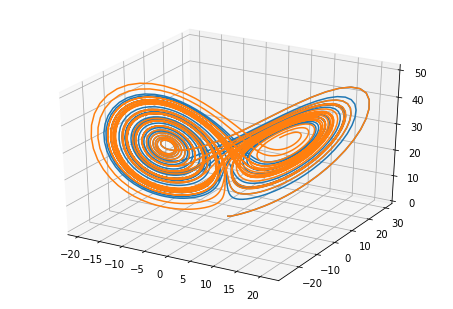

In [45]:
# 当参数为某些值时，轨迹出现混沌现象
# 即微小的初值差别也会显著影响运动轨迹，下面是洛伦兹吸引子的轨迹计算
# 和绘制程序
from scipy.integrate import odeint
import numpy as np

def lorenz(w, t, p, r, b):
    # 给出位置矢量w和三个参数p，r，b
    # dx/dt, dy/dt. dz/dt
    x,y,z = w.tolist()
    # 直接与lorenz的计算公式对应
    return p*(y-x), x*(r-z), x*y-b*z

t = np.arange(0, 30, 0.01) # 创建时间点
# 调用ode对lorenz进行求解，用两个不同的初值
track1 = odeint(lorenz, (0.0, 1.00, 0.00), t, args=(10.0, 28.0, 3.0))
track2 = odeint(lorenz, (0.0, 1.01, 0.00), t, args=(10.0, 28.0, 3.0))

# 绘图
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(track1[:,0], track1[:,1], track1[:,2])
ax.plot(track2[:,0], track2[:,1], track2[:,2])
plt.show()
